In [1]:
import requests
import pandas as pd
import json
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
transfer_topic = '0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'
swap_topic = '0xd78ad95fa46c994b6551d0da85fc275fe613ce37657fb8d5e3d130840159d822'

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()
key = os.getenv("scan_key")

In [4]:

def check_if_contract(x):
    url = f'https://api.basescan.org/api?module=contract&action=getcontractcreation&contractaddresses={x}&apikey={key}'
    # print(url)
    response = requests.get(url)
    data = response.json()
    return data['result'] is not None

# user = 0x2844507d9e0e9aaa1af073ab96a7757e05ec07e8
# contract = 0xac17ee2beE7E06D3E98f7F99818572Ed9EA5774D
check_if_contract('0xac17ee2beE7E06D3E98f7F99818572Ed9EA5774D')

True

In [5]:
# https://api.basescan.org/api
#    ?module=contract
#    &action=getabi
#    &address=0xe1621db14277d66c356e14888c57ef1c0c0dc195
#    &apikey=YourApiKeyToken

def get_abi(x):
    url = f'https://api.basescan.org/api?module=contract&action=getabi&address={x}&apikey={key}'
    # print(url)
    response = requests.get(url)
    data = response.json()
    return data['result']

get_abi('0x2844507d9e0e9aaa1af073ab96a7757e05ec07e8')

'Contract source code not verified'

In [6]:
contract_address= '0xac17ee2beE7E06D3E98f7F99818572Ed9EA5774D'.lower()
uniswap_pair = '0x66873a6d45e05b09203c8cc33f89bb2cf5cbb863'.lower()
other_router ='0x11ddd59c33c73c44733b4123a86ea5ce57f6e854'.lower()
other = '0xedc13d6f4456bf5a4293b4b264d1640dcb863fdc'.lower()
other2 = '0x6131b5fae19ea4f9d964eac0408e4408b66337b5'.lower()
other3 = '0xdb6f1920a889355780af7570773609bd8cb1f498'.lower()

In [7]:
from dotenv import load_dotenv
import os
load_dotenv()
key = os.getenv("scan_key")

In [8]:
address = contract_address
fromBlock = 0
toBlock = 1000000000
current_result = None
result = []
while True:
    print(fromBlock)

    url = f'https://api.basescan.org/api?module=logs&action=getLogs&address={address}&topic={transfer_topic}&fromBlock={fromBlock}&toBlock={toBlock}&apikey={key}'

    response = requests.get(url)
    response = json.loads(response.text)

    current_result = response['result']
    assert (type(current_result) == list)
    result.extend(current_result)

    if current_result == None or len(current_result) == 1000:
        fromBlock = int(result[-1]['blockNumber'], 16) + 1
    else:
        break
    time.sleep(0.1)
len(result)



0
11369327
11384869
11405376
11421945
11458776
11513637
11602109
11723932
11760089
11789036
11815553
11858977
11898943


13367

In [9]:
import pandas as pd
df = pd.DataFrame(result[0:10000])
df.astype('str').drop_duplicates().shape

(10000, 11)

In [10]:
def extend_address(x):
    return '0x000000000000000000000000' + x[2:].zfill(40)

def fix_address(x):
    return '0x' + x[26:].zfill(40)

In [11]:
omit_addresses = ['0x000000000000000000000000776bd83369ef7e91e774c8b187bb6acdce89586e']
tmp_df = df.loc[df.apply(lambda x: set(x['topics']).intersection(set(omit_addresses)) == set(), axis=1)]
# make sure transfer_topic is in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: transfer_topic in x['topics'], axis=1)]
# make sure the token address is not in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address(contract_address) not in x['topics'], axis=1)]
# make sure the uniswap pair is not in the topics   
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address(uniswap_pair) not in x['topics'], axis=1)]
# make sure 0x0000000000000000000000000000000000000000 is not in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address('0x0000000000000000000000000000000000000000') not in x['topics'], axis=1)]
# make sure the other router is not in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address(other_router) not in x['topics'], axis=1)]
# make sure the other address is not in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address(other) not in x['topics'], axis=1)]
# make sure the other2 address is not in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address(other2) not in x['topics'], axis=1)]
# make sure the other3 address is not in the topics
tmp_df = tmp_df.loc[tmp_df.apply(lambda x: extend_address(other3) not in x['topics'], axis=1)]

                                

tmp_df.shape

(98, 11)

In [12]:
tmp_df

,address,topics,data,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex
970,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xad7a5d,0x22a77f3241fe3408180650363bf71e3cc1fe0cae375d...,0x65e5519d,0xe8f8,0x104ff1,0x5,0xa7df46d547e3d235545785388370770793e36046bb41...,0x3
1132,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xad7e06,0x1ee4823df516bf3e5e1a9fab347e042024bbe18c1e7f...,0x65e558ef,0xf434a,0x2f0061,0x,0x1bdd9b26a7b4961da77ea1ec979b91dd1b372fb97440...,0xa
1340,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xad8398,0xa71580658e39e07274c29cea67be010ff9855bbb7a61...,0x65e56413,0x38c0,0x106c50,0x12,0xfb5267a69d3017e2caf2338f753a90bc09da09466029...,0xa
1761,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xada05d,0x8ab7bdff7e88ae702c9a1c72dc2d845cdc93f4c52115...,0x65e59d9d,0xf4353,0x2f6201,0x1,0xf67b3dc59c5e93b717ee8d1151bdab89dd6ad73bce5e...,0x2
1895,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xada824,0x2a940a8f2d4ad00c9578b0cd510f65adb9f6c55639c7...,0x65e5ad2b,0xf4240,0x10f770,0x,0xc2f5ccbabad68cc195a37df3ac0ce5ce80d8623f8213...,0x2
...,...,...,...,...,...,...,...,...,...,...,...
9640,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xb3c8c9,0xb38cb03644db839228ffb5c5dc961c3561187764cfb7...,0x65f1ee75,0xf438d,0x101419,0x1b,0x0bb5a8d6261a6b3f668742d712865a859e0b69f42c71...,0x6
9712,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xb3cc57,0x33210c20c2560fa3327e76ca18c09a0918d3ddb4f56a...,0x65f1f591,0xf437c,0xef721,0x29,0xc53746a6d53a30300b8c47a8372bcdaf3e0471690e2c...,0xc
9802,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xb3d107,0x5b17494a3369f72dd112a07b1fcbe5e85879f2aff555...,0x65f1fef1,0x19903,0x104c8e,0x36,0xef55b93e27e8b6132e10a864e1872048d560f9aee39a...,0x2d
9912,0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,0xb3db75,0xd8eb7a21c814feceb314d7d20d8e8fdbdee656979d5e...,0x65f213cd,0x42081b,0x108e6e,0x29,0x3388573685991b0272c93ba8b0d63952313dc0eedc4f...,0x4


In [13]:
linked_accounts = []
for x in tmp_df['topics'].copy():
    # print(x)
    # remove the transfer topic
    x = x[1:]
    # convert the address to a string
    x = [fix_address(y) for y in x]
    # print(x)
    linked_accounts.append(x)

linked_accounts


[['0xef264aad2c7e29089c56a528d324cf338c9e8b7e',
  '0x228fab75b59516086c46d6471b359a72db3958b2'],
 ['0x3f4f4158f1c23c4c51c6ed7b92b6bd26a1d6fda0',
  '0xb30f281e46e63a9af530034f5e3fd651ee0355e5'],
 ['0x96aa072c445e9dd86693cf71d3ee01f1cd6df9b8',
  '0xcb35d3096cc85fe2c155c9117959dc0a8dbdd21d'],
 ['0x9e1edb2f78e38697891d736ddb6aa60df192b4c0',
  '0xb30f281e46e63a9af530034f5e3fd651ee0355e5'],
 ['0x452e6ab917199547d28fa3c852520b41497174be',
  '0xfba2d7d7069773392807438f36264ca31cec1067'],
 ['0x07a0a4378775da214a9c41c1284b9a1c1000c8b2',
  '0xab68d0ef90cc2d294570724e4c469f38422d818e'],
 ['0x9cd2b01e7f51a8baa6d41197c6af3ea8bba80add',
  '0x5b50dfabf23839ba9ff6a60c551fb7a668c6abb3'],
 ['0xeeb63b02b023234360f44549bd1e0b5bce37b14b',
  '0xabc2b3056ddc9922ed26c45a947bd3c3e0bca5b4'],
 ['0xeeb63b02b023234360f44549bd1e0b5bce37b14b',
  '0xabc2b3056ddc9922ed26c45a947bd3c3e0bca5b4'],
 ['0x53bc98479afa0e6d1a6c36fb94b4034581e8c4de',
  '0x9262f816ae20b9f90c5632f6554adc734bbfa027'],
 ['0x769a9baa8515fcc0082995e65

In [14]:


print(fix_address('0x0000000000000000000000006131b5fae19ea4f9d964eac0408e4408b66337b5'))
print(fix_address('0x000000000000000000000000296fd8712a56c7e453e4b7edc20ebcab7cc20e82'))

0x6131b5fae19ea4f9d964eac0408e4408b66337b5
0x296fd8712a56c7e453e4b7edc20ebcab7cc20e82


In [15]:
balances = {   }
counter = 0
for _result in result:
    # print(_result)
    if _result['topics'][0] == transfer_topic:
        mode = 'transfer'
        _from = fix_address(_result['topics'][1])
        to = fix_address(_result['topics'][2])
        amount = int(_result['data'], 16)
        balances[_from] = balances.get(_from, 0) - amount
        balances[to] = balances.get(to, 0) + amount
        counter += 1

# sort bala
balances_df = pd.DataFrame(balances.items(), columns=['address', 'balance'])
balances_df['balance'] = balances_df['balance'].astype('float') 
balances_df = balances_df.sort_values('balance', ascending=False)
# remove negative balances
balances_df = balances_df.loc[balances_df['balance'] >= 0]
balances_df.head(3)


,address,balance
2,0xedc13d6f4456bf5a4293b4b264d1640dcb863fdc,9.260782e+14
3,0x66873a6d45e05b09203c8cc33f89bb2cf5cbb863,5.201168e+14
559,0x2516553255a2fba7777a725d7ecda4000369d773,3.386646e+14


In [16]:
# pip install networkx

In [17]:
# # from pyvis.network import Network
# # net = Network(notebook=True, cdn_resources='in_line')

# # for balance in balances_df.head(3).iterrows():
# #     net.add_node(balance[1]['address'], label=balance[1]['address'], title=balance[1]['address'])

# # # draw the network in a notebook
# # net.show('example.html')

# import networkx as nx
# import matplotlib.pyplot as plt

# G = nx.DiGraph()
# for balance in balances_df.head(3).iterrows():
#     G.add_node(balance[1]['address'], label=balance[1]['address'], title=balance[1]['address'], node_size=100)

# for pair in linked_accounts:
#     for i in range(0, len(pair) - 1):
#         G.add_edge(pair[i], pair[i+1])


# # draw the network in a notebook
# nx.draw(G, with_labels=True)


In [18]:
balances_df['balance_pct'] = (balances_df['balance'] / balances_df['balance'].sum() * 100).astype('float').round(2)

In [19]:
# for x in linked_accounts:
#     assert x[0] in balances_df['address'].values, x[0]
#     assert x[1] in balances_df['address'].values, x[1]

In [20]:
# balances['0x1bc5cf80f308518f000dde4c8f8139268aa014db']

In [21]:
import plotly.graph_objs as go
import networkx as nx
import pandas as pd

# Assuming balances_df and linked_accounts are defined

# Create a directed graph
G = nx.DiGraph()

sizes = []
node_text = []
# Add nodes with balance as size
for balance in balances_df.iloc[1:].loc[balances_df['balance'] >= 0].iterrows():
    G.add_node(balance[1]['address'], label=balance[1]['address'], title=balance[1]['address'], size=balance[1]['balance'])
    sizes.append(np.max([0,balance[1]['balance']])+1)
    node_text.append(balance[1]['address'] + ' ' + str(balance[1]['balance_pct']) + '%')

# take log of sizes
sizes = np.sqrt(sizes / np.sum(balances_df['balance']) *100) * 20 + 1

# Add edges for linked accounts
for pair in linked_accounts:
    G.add_edge(pair[0], pair[1], weight=10)

# Generate positions for each node

pos = nx.spring_layout(G, k=0.05, iterations=50)

# Create edge traces
edge_x = []
edge_y = []
edge_text = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None]) # None is used to prevent lines from connecting to each other
    edge_y.extend([y0, y1, None])
    edge_text.append(edge[0] + ' -> ' + edge[1])

edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=3, color='#F00'), text=edge_text, mode='lines', hoverinfo='text')
# edge_trace.text = edge_text

# Create node traces
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text',
                        marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True, color=[], size=sizes,
                                    colorbar=dict(thickness=15, title='Node Connections', xanchor='left', titleside='right'),
                                    line_width=2))

# Add color to node points
node_adjacencies = []
# node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_info = '# of connections: '+str(len(adjacencies[1]))
    
    # node_text.append(node_info)

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(showlegend=False, hovermode='closest',
                                 margin=dict(b=0, l=0, r=0, t=0),
                                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Show the figure
fig.show()


In [22]:
edge_trace.text

('0x35af480b2cfb3dd84f73b6498e751cf7636b2287 -> 0x1c1aad6cdb6672c75442c8362c87fb73563cdfc5',
 '0x68c8ec42d730b57bb3c027a0c2935bcb225d7e75 -> 0x22b0e8eecd24819237648aeee3e648b5e4d5f17b',
 '0xf673dbef39b7623e76e3ace6c4eb4370224ec229 -> 0xd5fc32f0c6df7b49ecf82901b67894fbf066ff1f',
 '0x5ceca823922f186dd21c058526af0ed923b960aa -> 0x2b334b1aa8ca74429dbff29cd48a0ff9aebaf346',
 '0xf89439f586afde31580225107679036ea0dc84cf -> 0x85b8be7f49a35f4ae0ce77a54c3b17fa312a5f15',
 '0xc31cf8a0603b55149c3a4a8036c44bea93fc096d -> 0xd8b8534044815155dfe8254e49f574b8d37cf261',
 '0xc2f176731a1cb124485fc74c9fce696630050475 -> 0x56ff2c74c92e70acc5c3d950d58c4493be59adf4',
 '0x791569bd3f60c672cdfd82413ecca9314decd424 -> 0x2c6e99d4d7d6f3e2fa43524b0673918b555082f3',
 '0x96aa072c445e9dd86693cf71d3ee01f1cd6df9b8 -> 0xcb35d3096cc85fe2c155c9117959dc0a8dbdd21d',
 '0xcf624deef90e044b54eb61534a6d3e3aba1e7def -> 0xfa14c444887207ff46f4b1fe150885189b22aea1',
 '0x1111111254eeb25477b68fb85ed929f73a960582 -> 0x0e9e393e145c98343bc1

In [23]:
first_trade = {}
counter = 0
for _result in result:
    # # print(_result)
    if _result['topics'][0] == transfer_topic:
        _from = _result['topics'][1]
        to = _result['topics'][2]
        timestamp = int(_result['timeStamp'], 16)
        if _from not in first_trade:
            first_trade[_from] = timestamp
        if to not in first_trade:
            first_trade[to] = timestamp


# sort bala
first_trade_df = pd.DataFrame(first_trade.items(), columns=['address', 'first_trade'])
first_trade_df['first_trade'] = pd.to_datetime(first_trade_df['first_trade'], unit='s', utc=True)
first_trade_df = first_trade_df.sort_values('first_trade', ascending=True)
first_trade_df.head(3)

,address,first_trade
0,0x00000000000000000000000000000000000000000000...,2024-03-04 02:09:41+00:00
1,0x00000000000000000000000035af480b2cfb3dd84f73...,2024-03-04 02:09:41+00:00
2,0x000000000000000000000000edc13d6f4456bf5a4293...,2024-03-04 02:12:23+00:00


In [24]:
total_bought = {}
for _result in result:
    if _result['topics'][0] == transfer_topic:
        _from = _result['topics'][1]
        to = _result['topics'][2]
        amount = int(_result['data'], 16)
        total_bought[to] = total_bought.get(to, 0) + amount

total_bought_df = pd.DataFrame(total_bought.items(), columns=['address', 'total_bought'])
total_bought_df['total_bought'] = total_bought_df['total_bought'].astype('float')
total_bought_df = total_bought_df.sort_values('total_bought', ascending=False)
total_bought_df.head(5)


,address,total_bought
2,0x00000000000000000000000066873a6d45e05b09203c...,3.167545e+16
0,0x00000000000000000000000035af480b2cfb3dd84f73...,1.024591e+16
3,0x000000000000000000000000ac17ee2bee7e06d3e98f...,4.567830e+15
63,0x00000000000000000000000011ddd59c33c73c44733b...,1.166158e+15
1,0x000000000000000000000000edc13d6f4456bf5a4293...,1.000000e+15


In [25]:
# pd.options.display.colwidth = 1000
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)

balance_changes = []
counter = 0
for _result in result:
    # print(_result)
    if _result['topics'][0] == transfer_topic:
        mode = 'transfer'
        _from = _result['topics'][1]
        to = _result['topics'][2]
        amount = int(_result['data'], 16)
        change1 = {
            'address': _from,
            'amount': -amount,
            'timestamp': int(_result['timeStamp'], 16)
        }
        change2 = {
            'address': to,
            'amount': amount,
            'timestamp': int(_result['timeStamp'], 16)
        }
        balance_changes.append(change1)
        balance_changes.append(change2)

# sort bala
balance_changes_df = pd.DataFrame(balance_changes)
balance_changes_df['amount'] = balance_changes_df['amount'].astype('float')
balance_changes_df = balance_changes_df.sort_values('timestamp')
balance_changes_df.head(2)


,address,amount,timestamp
0,0x0000000000000000000000000000000000000000000000000000000000000000,-1.000000e+16,1709518181
1,0x00000000000000000000000035af480b2cfb3dd84f73b6498e751cf7636b2287,1.000000e+16,1709518181


In [31]:

# Convert timestamp to datetime
balance_changes_df['datetime'] = pd.to_datetime(balance_changes_df['timestamp'], unit='s')

# Set the timestamp to the nearest hour
balance_changes_df['hour_bin'] = balance_changes_df['datetime'].dt.floor('H')

# Group by address and hour_bin, summing the amounts
grouped_data = balance_changes_df.groupby(['address', 'hour_bin']).agg({'amount': 'sum'}).reset_index()


/var/folders/nv/5rcbmjpn04xd4t34g6m6ngqh0000gn/T/ipykernel_34267/3135120409.py:5: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



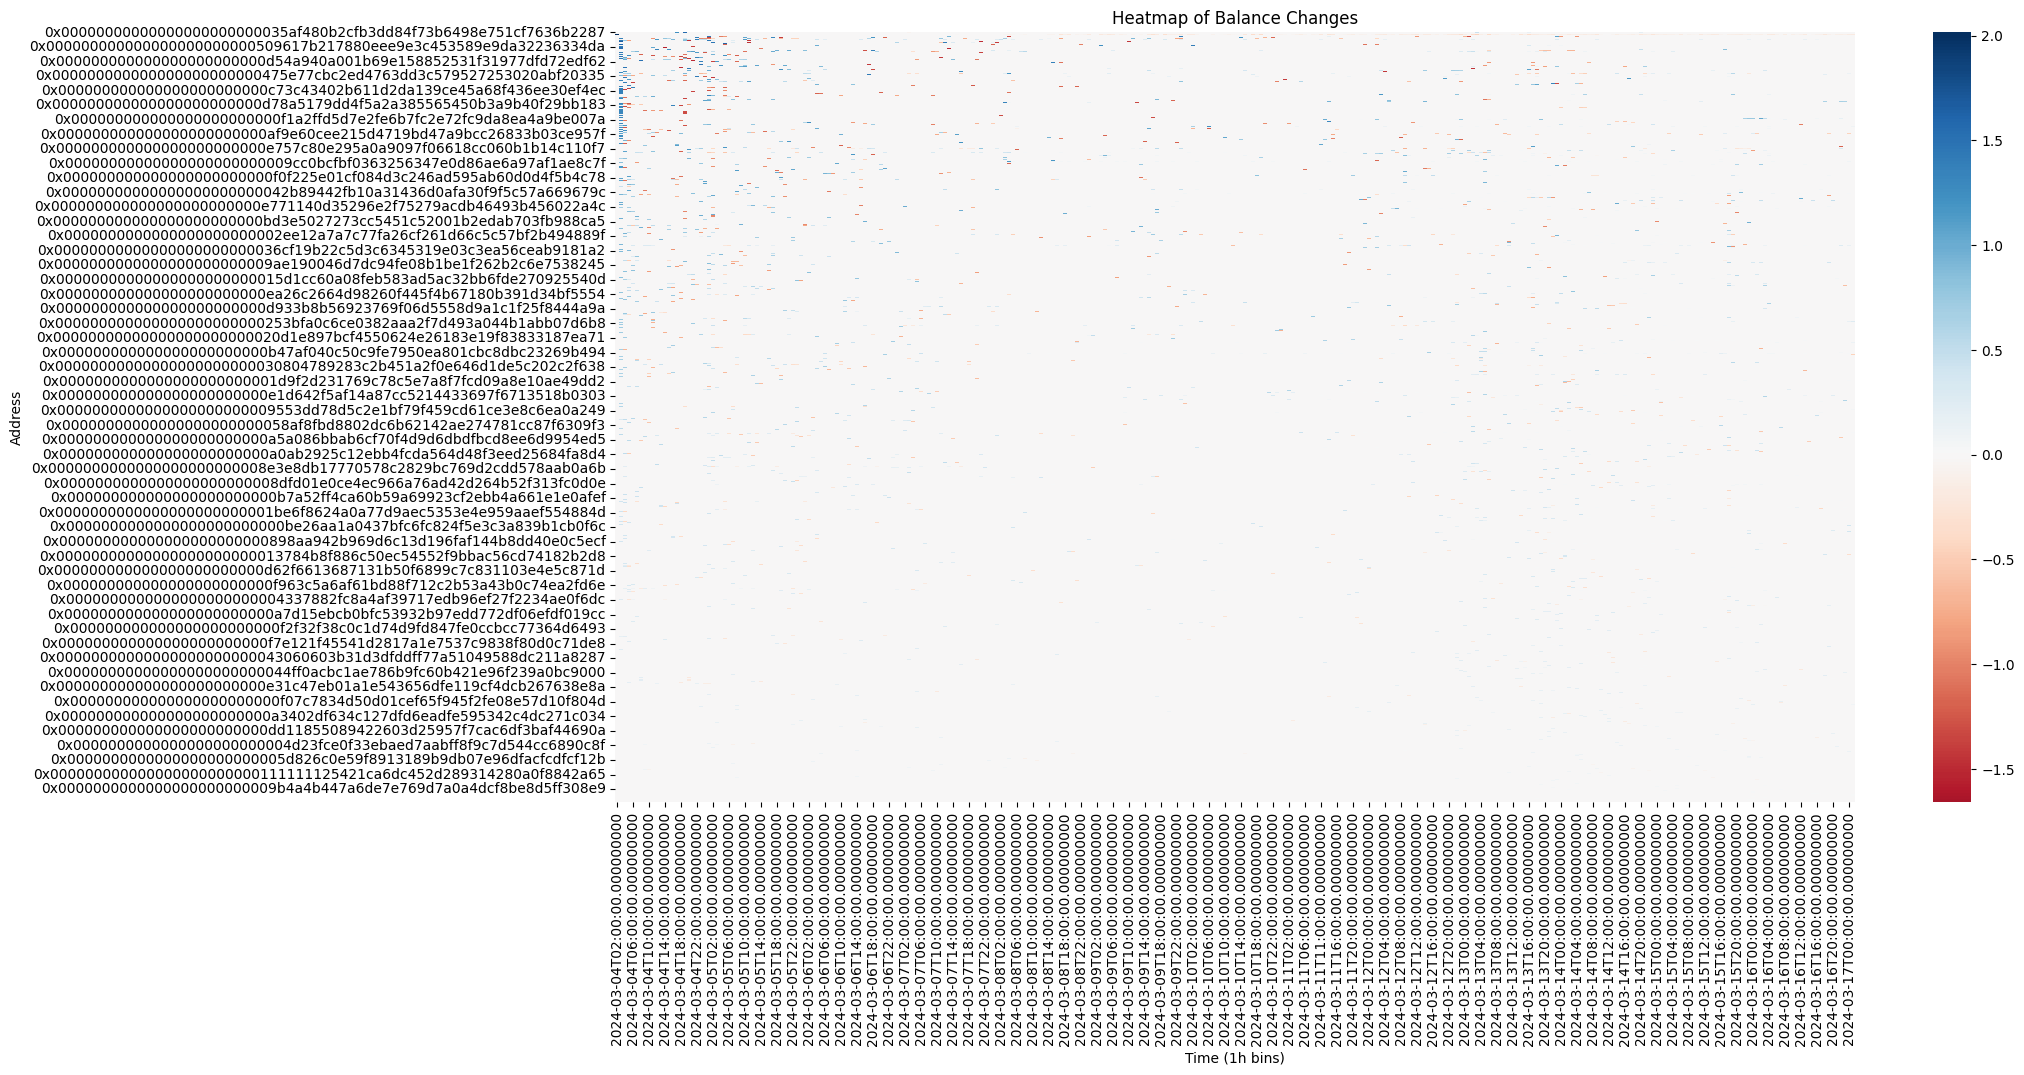

In [32]:
def do_convert(x):
    if x < 0:
        return np.sqrt(np.log1p(x*-1))*-1
    else:
        return np.sqrt(np.log1p(x))
# Pivot the table for the heatmap data

grouped_data2 = grouped_data.copy()
grouped_data2['amount'] = grouped_data['amount']/grouped_data['amount'].abs().mean()
grouped_data2['amount'] = grouped_data2['amount'].apply(do_convert)
pivot_table = grouped_data2.pivot(index='address', columns='hour_bin', values='amount').fillna(0)

pivot_table = pivot_table.loc[total_bought_df.address.to_list(),:]

# Replace NaN values with 0 for the heatmap
pivot_table_filled = pivot_table.iloc[1:-3].fillna(0)

# Plot the heatmap
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Balance Changes")
sns.heatmap(pivot_table_filled, cmap="RdBu", center=0)
plt.xlabel("Time (1h bins)")
plt.ylabel("Address")
plt.xticks()
plt.show()


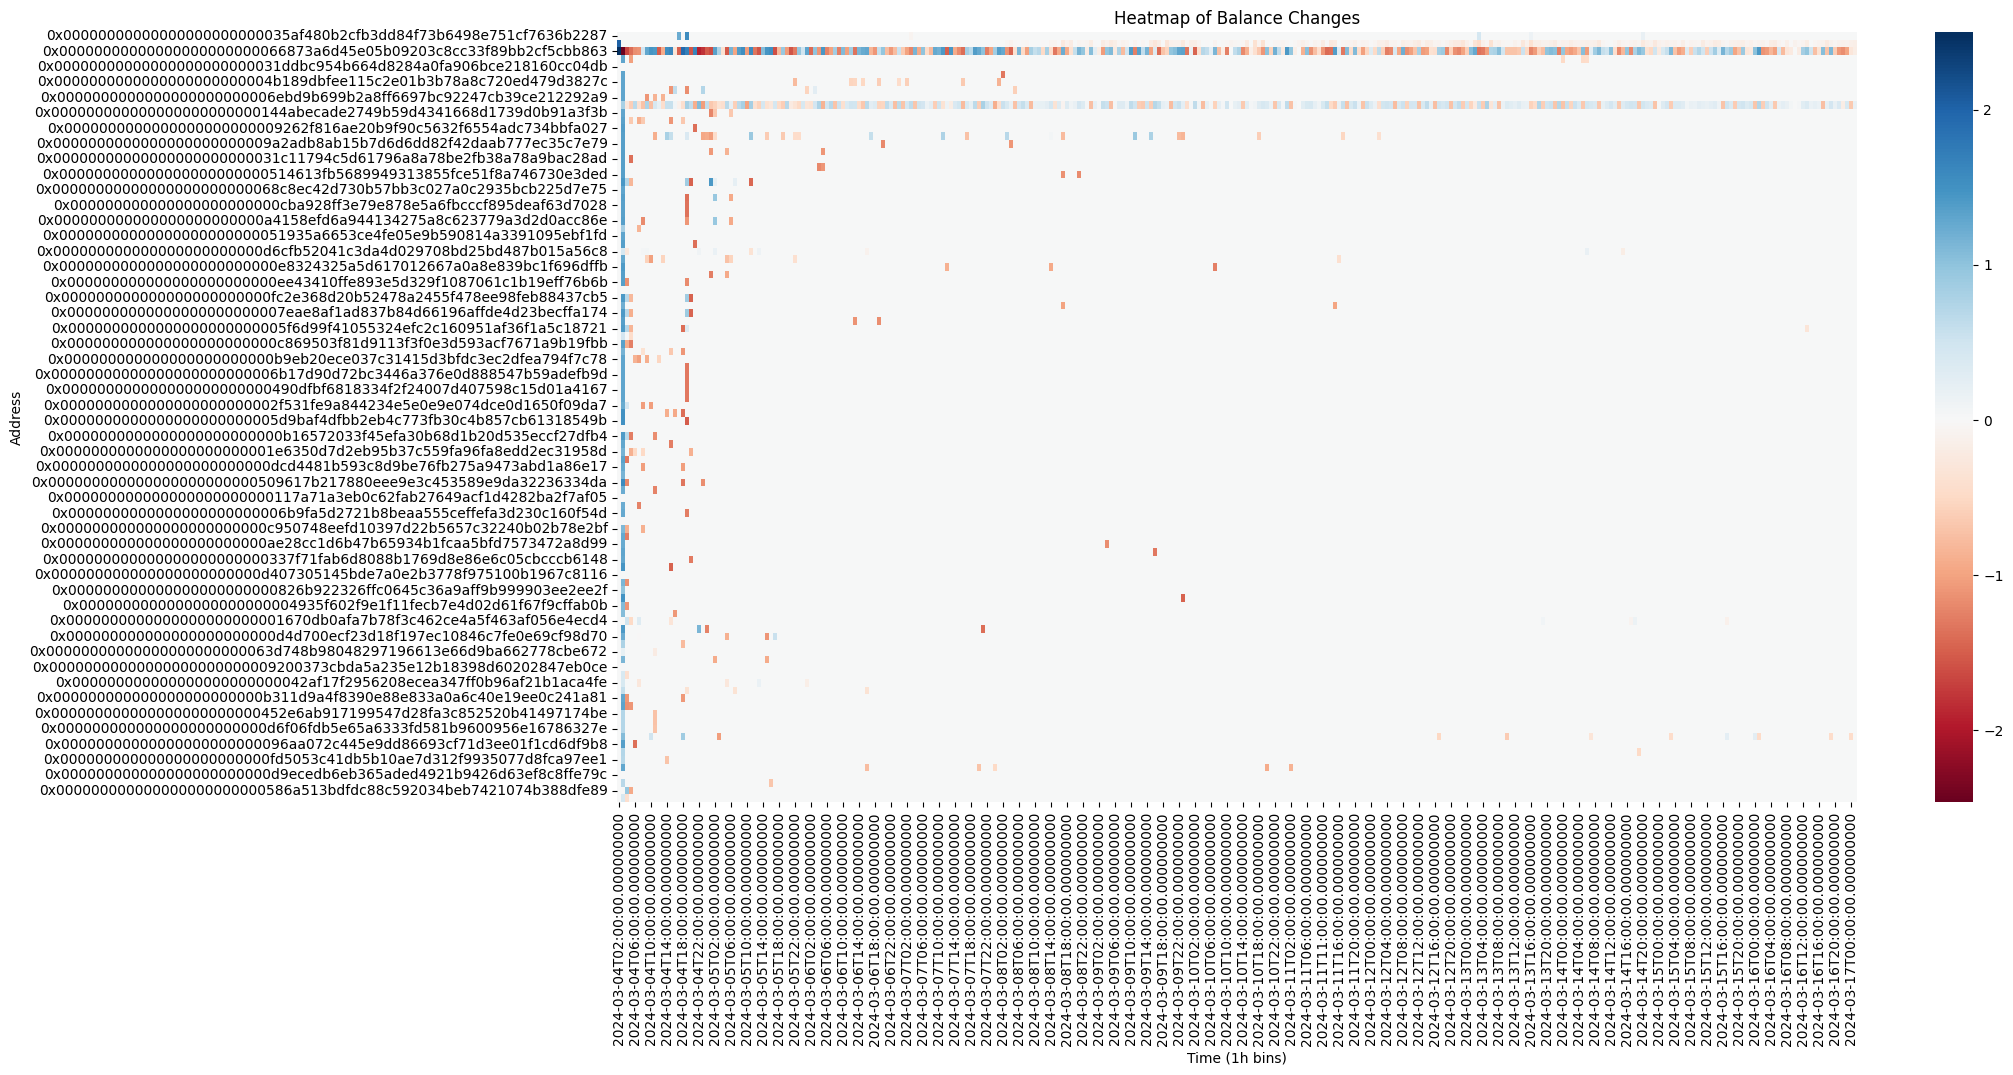

In [33]:
def do_convert(x):
    if x < 0:
        return np.sqrt(np.log1p(x*-1))*-1
    else:
        return np.sqrt(np.log1p(x))
# Pivot the table for the heatmap data

grouped_data2 = grouped_data.copy()
grouped_data2['amount'] = grouped_data['amount']/grouped_data['amount'].abs().mean()
grouped_data2['amount'] = grouped_data2['amount'].apply(do_convert)
pivot_table = grouped_data2.pivot(index='address', columns='hour_bin', values='amount').fillna(0)

pivot_table = pivot_table.loc[first_trade_df.address.to_list(),:]

# Replace NaN values with 0 for the heatmap
pivot_table_filled = pivot_table.iloc[1:-3].fillna(0).iloc[:100,:]

# Plot the heatmap
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Balance Changes")
sns.heatmap(pivot_table_filled, cmap="RdBu", center=0)
plt.xlabel("Time (1h bins)")
plt.ylabel("Address")
plt.xticks()
plt.show()


In [29]:
# import time
# contract_address = '0xa100b6E6b37d628E489e4577965Cb6f446D01a14'
# # pool_factory_address = '0x8909Dc15e40173Ff4699343b6eB8132c65e18eC6'
# pair_address = '0x09277eb704229C88AacDC6c9A33469862C9969d5' # - tracks the lp token
# transfer_topic = '0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'
# swap_topic = '0xd78ad95fa46c994b6551d0da85fc275fe613ce37657fb8d5e3d130840159d822'


# address = contract_address
# fromBlock = 0
# toBlock = 1000000000
# current_result = None
# result = []
# while True:
#     print(fromBlock)

#     url = f'https://api.basescan.org/api?module=logs&action=getLogs&address={pair_address}&topic={swap_topic}&fromBlock={fromBlock}&toBlock={toBlock}&page={page}&apikey={key}'

#     response = requests.get(url)
#     response = json.loads(response.text)

#     current_result = response['result']
#     assert (type(current_result) == list)
#     result.extend(current_result)

#     if current_result == None or len(current_result) == 1000:
#         fromBlock = int(result[-1]['blockNumber'], 16) + 1
#     else:
#         break
#     time.sleep(0.1)
# len(result)



In [30]:
result[5]

{'address': '0xac17ee2bee7e06d3e98f7f99818572ed9ea5774d',
 'topics': ['0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef',
  '0x00000000000000000000000035af480b2cfb3dd84f73b6498e751cf7636b2287',
  '0x000000000000000000000000edc13d6f4456bf5a4293b4b264d1640dcb863fdc'],
 'data': '0x00000000000000000000000000000000000000000000000000038d7ea4c68000',
 'blockNumber': '0xad6892',
 'blockHash': '0x90d3d38f7eea830969c2406e6d7adc0b8cb6eb7c07855967118f3dab20551f4c',
 'timeStamp': '0x65e52e07',
 'gasPrice': '0xef428',
 'gasUsed': '0x36621',
 'logIndex': '0x27',
 'transactionHash': '0xb81331b3ff828bedcc8a17fef0392136313eba9c2207b03d631002dc3f62d024',
 'transactionIndex': '0x6'}